# Estimation of the A_G per OC

That estimation of A_G is used to make the OC isochrone in order to get the stellar mass...

In [1]:
using PyCall
using Distributions
using Statistics

using Distances
using Random , Formatting

rootdir = "/home/stephane/Science/cluster/GAIA"

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

import PyPlot, CSV

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/plotdens"
ocdir= "$wdir/oc"
oc2dir= "$wdir/oc2"

cd(wdir)

In [2]:
oc= "Alessi 1-2.1deg-oc.csv"
oc= "Alessi 2-1.7deg-oc.csv"

ocfile1= "$ocdir/$oc"
ocfile2= "$oc2dir/$oc"

df1= CSV.read(ocfile1, delim= ";")
df2= CSV.read(ocfile2, delim= ";")

,ra,dec,l,b,distance,pmra,pmdec,X,Y
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,72.629,54.3802,153.347,6.29793,626.925,-0.855992,-1.02623,626.815,11.6972
2,71.7816,54.4187,153.0,5.94265,625.1,-0.952757,-1.13926,625.033,7.88446
3,72.8858,54.77,153.137,6.65968,621.917,-0.807593,-1.01466,621.839,9.33161
4,72.2909,54.8558,152.852,6.44884,628.529,-0.925795,-1.18543,628.497,6.30027
5,72.2319,54.8153,152.862,6.39679,641.6,-0.716128,-1.18006,641.566,6.53906
6,70.4711,54.8238,152.196,5.62831,647.987,-0.836825,-0.983811,647.933,-0.927063
7,70.8347,54.7588,152.383,5.74444,620.917,-0.687066,-1.10037,620.88,1.13979
8,70.6226,54.973,152.14,5.79183,621.208,-0.88692,-1.07526,621.175,-1.49619
9,70.605,55.3645,151.835,6.04019,641.913,-0.811499,-0.993662,641.883,-4.95707


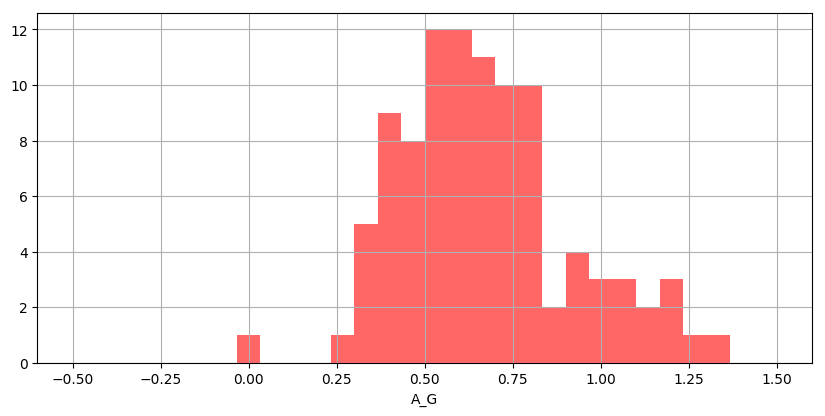

0.6392500102519989


In [3]:
fig= PyPlot.figure(figsize=(10,10))

ax = PyPlot.subplot(211)
PyPlot.grid("on")
nbins = 30
h = PyPlot.hist(df2.ag,nbins,range = [-0.5,1.5], color = "r", alpha=0.6 , label = "AG")
PyPlot.xlabel("A_G")

agmedian= median(df2.ag[.! isnan.(df2.ag)])
println(median(agmedian))
